<a href="https://colab.research.google.com/github/Tejas-0001/demo1/blob/main/Quantization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# For Python 3.9.18

# accelerate==0.26.1
# seaborn==0.13.1
# torch==2.1.1
# transformers==4.35.0

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from PIL import Image
from torchvision import transforms
import torchvision.transforms as transforms

# Helper Functions

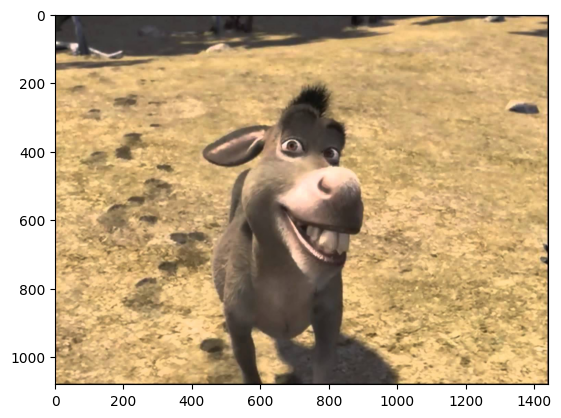

In [ ]:
image = Image.open('DONKEY.jpg')
plt.imshow(image)

In [ ]:
# prompt: pil image to np areay

import numpy as np

image_np = np.array(image)


In [ ]:
t = torch.tensor(image_np)
print(t.shape)

torch.Size([1080, 1440, 3])


In [ ]:
# prompt: tensor to np array

n = t.numpy()
print(n.shape)


(1080, 1440, 3)


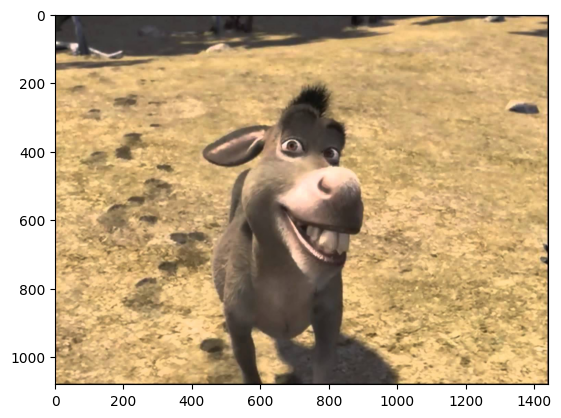

In [ ]:
# prompt: np array to img

# Assuming 'n' is the numpy array you want to convert to an image
from PIL import Image
img = Image.fromarray(n.astype('uint8'), 'RGB')
# Now 'img' is a PIL Image object
plt.imshow(img)


In [ ]:
transform = transforms.ToTensor()
tensor_image = transform(image)
print(tensor_image.shape)

torch.Size([3, 1080, 1440])


In [ ]:
tensor_image

tensor([[[0.0235, 0.0392, 0.0549,  ..., 0.1137, 0.0745, 0.0510],
         [0.0353, 0.0549, 0.0784,  ..., 0.1647, 0.1255, 0.0941],
         [0.0471, 0.0706, 0.1020,  ..., 0.2157, 0.1725, 0.1333],
         ...,
         [0.4510, 0.5686, 0.7451,  ..., 0.7373, 0.5176, 0.4000],
         [0.3529, 0.4275, 0.5451,  ..., 0.5373, 0.3765, 0.2980],
         [0.2471, 0.2824, 0.3451,  ..., 0.3451, 0.2549, 0.2235]],

        [[0.0314, 0.0471, 0.0627,  ..., 0.0980, 0.0667, 0.0431],
         [0.0431, 0.0627, 0.0863,  ..., 0.1490, 0.1098, 0.0863],
         [0.0549, 0.0784, 0.1098,  ..., 0.1922, 0.1490, 0.1176],
         ...,
         [0.3529, 0.4745, 0.6471,  ..., 0.6431, 0.4157, 0.3098],
         [0.2627, 0.3412, 0.4627,  ..., 0.4549, 0.2902, 0.2235],
         [0.1608, 0.2000, 0.2667,  ..., 0.2706, 0.1765, 0.1529]],

        [[0.0118, 0.0275, 0.0431,  ..., 0.0941, 0.0706, 0.0471],
         [0.0235, 0.0431, 0.0667,  ..., 0.1451, 0.1137, 0.0902],
         [0.0353, 0.0588, 0.0902,  ..., 0.1922, 0.1569, 0.

In [ ]:
r_image = t.permute(1, 2, 0)  # Permute dimensions
transform = transforms.ToPILImage()
image = transform(r_image)
plt.imshow(image)

ValueError: pic should not have > 4 channels. Got 1440 channels.

In [ ]:
# prompt: how to convert tensor torch.Size([3, 1080, 1440]) back into image

import torch
import torch.nn as nn
import torch.nn.functional as F
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from PIL import Image
from torchvision import transforms
import torchvision.transforms as transforms
# For Python 3.9.18

# accelerate==0.26.1
# seaborn==0.13.1
# torch==2.1.1
# transformers==4.35.0
# # Helper Functions
image = Image.open('DONKEY.jpg')
plt.imshow(image)
transform = transforms.ToTensor()
tensor_image = transform(image)
print(tensor_image.shape)
tensor_image
tensor_image = tensor_image.permute(1, 2, 0)  # Permute dimensions
transform = transforms.ToPILImage()
image = transform(tensor_image)
plt.imshow(image)

# Assuming tensor_image is your tensor of shape torch.Size([3, 1080, 1440])
tensor_image = tensor_image.permute(1, 2, 0)  # Permute dimensions back to original order
transform = transforms.ToPILImage()
image = transform(tensor_image)
plt.imshow(image)


In [ ]:
def plot_matrix(tensor, ax, title, vmin=0, vmax=1, cmap=None):
    """
    Plot a heatmap of tensors using seaborn
    """
    sns.heatmap(tensor.cpu().numpy(), ax=ax, vmin=vmin, vmax=vmax, cmap=cmap, annot=True, fmt=".2f", cbar=False)
    ax.set_title(title)
    ax.set_yticklabels([])
    ax.set_xticklabels([])


def plot_quantization_errors(original_tensor, quantized_tensor, dequantized_tensor, dtype = torch.int8, n_bits = 8):
    """
    A method that plots 4 matrices, the original tensor, the quantized tensor
    the de-quantized tensor and the error tensor.
    """
    # Get a figure of 4 plots
    fig, axes = plt.subplots(1, 4, figsize=(15, 4))

    # Plot the first matrix
    plot_matrix(original_tensor, axes[0], 'Original Tensor', cmap=ListedColormap(['white']))

    # Get the quantization range and plot the quantized tensor
    q_min, q_max = torch.iinfo(dtype).min, torch.iinfo(dtype).max
    plot_matrix(quantized_tensor, axes[1], f'{n_bits}-bit Linear Quantized Tensor', vmin=q_min, vmax=q_max, cmap='coolwarm')

    # Plot the de-quantized tensors
    plot_matrix(dequantized_tensor, axes[2], 'Dequantized Tensor', cmap='coolwarm')

    # Get the quantization errors
    q_error_tensor = abs(original_tensor - dequantized_tensor)
    plot_matrix(q_error_tensor, axes[3], 'Quantization Error Tensor', cmap=ListedColormap(['white']))

    fig.tight_layout()
    plt.show()


# Quantize and De-quantize a Tensor

In [ ]:
example = torch.rand(3,3)
example

tensor([[0.9417, 0.4853, 0.8160],
        [0.5699, 0.8882, 0.3907],
        [0.8588, 0.9953, 0.5422]])

In [ ]:
example = example * 255
example

tensor([[240.1227, 123.7510, 208.0741],
        [145.3185, 226.4906,  99.6398],
        [218.9926, 253.7906, 138.2656]])

In [ ]:
example = example.to(torch.int8)
example

tensor([[100,  47, -38],
        [ 28,   5, 110],
        [-76, 109, -93]], dtype=torch.int8)

In [ ]:
example_max = example.max().item()
example_max

253.7906036376953

In [ ]:
example_min = example.min().item()
example_min

99.63978576660156

In [ ]:
scale = torch.ones(1,dtype=torch.float16)
scale

tensor([1.], dtype=torch.float16)

In [ ]:
scale = (example_max - example_min) / (127 - (-128))
scale = torch.tensor(scale,dtype=torch.float16)
scale

tensor(0.6045, dtype=torch.float16)

In [ ]:
# value = scale(quant_value - zero_point)
for items in example:
    print(items)
    print(items[0].item())

tensor([240.1227, 123.7510, 208.0741])
240.12269592285156
tensor([145.3185, 226.4906,  99.6398])
145.31846618652344
tensor([218.9926, 253.7906, 138.2656])
218.99264526367188


In [ ]:
for row in example:
  for columns in row:
    print(columns)
    print(columns.item())
    print(columns.item() / scale)

tensor(240.1227)
240.12269592285156
tensor(397.2500, dtype=torch.float16)
tensor(123.7510)
123.7509536743164
tensor(204.7500, dtype=torch.float16)
tensor(208.0741)
208.07412719726562
tensor(344.2500, dtype=torch.float16)
tensor(145.3185)
145.31846618652344
tensor(240.3750, dtype=torch.float16)
tensor(226.4906)
226.49061584472656
tensor(374.7500, dtype=torch.float16)
tensor(99.6398)
99.63978576660156
tensor(164.8750, dtype=torch.float16)
tensor(218.9926)
218.99264526367188
tensor(362.2500, dtype=torch.float16)
tensor(253.7906)
253.7906036376953
tensor(419.7500, dtype=torch.float16)
tensor(138.2656)
138.26560974121094
tensor(228.7500, dtype=torch.float16)


In [ ]:
zero_point = 0

In [ ]:
scaled_example = example / scale + zero_point
scaled_example

tensor([[397.2304, 204.7189, 344.2131],
        [240.3976, 374.6791, 164.8322],
        [362.2754, 419.8410, 228.7302]])

In [ ]:
quant_example = torch.round(scaled_example)
quant_example

tensor([[397., 205., 344.],
        [240., 375., 165.],
        [362., 420., 229.]])

In [ ]:
def linear_q_with_scale_and_zero_point(tensor, scale, zero_point, dtype = torch.int8):

    scaled_and_shifted_tensor = tensor / scale + zero_point

    rounded_tensor = torch.round(scaled_and_shifted_tensor)

    q_min = torch.iinfo(dtype).min
    q_max = torch.iinfo(dtype).max

    q_tensor = rounded_tensor.clamp(q_min,q_max).to(dtype)

    return q_tensor

In [ ]:
### these are random values for "scale" and "zero_point"
### to test the implementation
scale = 5
zero_point = 0

In [ ]:
quantized_tensor = linear_q_with_scale_and_zero_point(t, scale, zero_point)
quantized_tensor

tensor([[[ 1,  2,  1],
         [ 2,  2,  1],
         [ 3,  3,  2],
         ...,
         [ 6,  5,  5],
         [ 4,  3,  4],
         [ 3,  2,  2]],

        [[ 2,  2,  1],
         [ 3,  3,  2],
         [ 4,  4,  3],
         ...,
         [ 8,  8,  7],
         [ 6,  6,  6],
         [ 5,  4,  5]],

        [[ 2,  3,  2],
         [ 4,  4,  3],
         [ 5,  6,  5],
         ...,
         [11, 10, 10],
         [ 9,  8,  8],
         [ 7,  6,  6]],

        ...,

        [[23, 18, 14],
         [29, 24, 19],
         [38, 33, 27],
         ...,
         [38, 33, 28],
         [26, 21, 18],
         [20, 16, 12]],

        [[18, 13, 10],
         [22, 17, 13],
         [28, 24, 18],
         ...,
         [27, 23, 19],
         [19, 15, 12],
         [15, 11,  9]],

        [[13,  8,  5],
         [14, 10,  6],
         [18, 14,  9],
         ...,
         [18, 14, 11],
         [13,  9,  7],
         [11,  8,  6]]], dtype=torch.int8)

In [ ]:
dequantized_tensor = scale * (quantized_tensor.float() - zero_point)
dequantized_tensor

tensor([[[  5.,  10.,   5.],
         [ 10.,  10.,   5.],
         [ 15.,  15.,  10.],
         ...,
         [ 30.,  25.,  25.],
         [ 20.,  15.,  20.],
         [ 15.,  10.,  10.]],

        [[ 10.,  10.,   5.],
         [ 15.,  15.,  10.],
         [ 20.,  20.,  15.],
         ...,
         [ 40.,  40.,  35.],
         [ 30.,  30.,  30.],
         [ 25.,  20.,  25.]],

        [[ 10.,  15.,  10.],
         [ 20.,  20.,  15.],
         [ 25.,  30.,  25.],
         ...,
         [ 55.,  50.,  50.],
         [ 45.,  40.,  40.],
         [ 35.,  30.,  30.]],

        ...,

        [[115.,  90.,  70.],
         [145., 120.,  95.],
         [190., 165., 135.],
         ...,
         [190., 165., 140.],
         [130., 105.,  90.],
         [100.,  80.,  60.]],

        [[ 90.,  65.,  50.],
         [110.,  85.,  65.],
         [140., 120.,  90.],
         ...,
         [135., 115.,  95.],
         [ 95.,  75.,  60.],
         [ 75.,  55.,  45.]],

        [[ 65.,  40.,  25.],
       

(1080, 1440, 3)


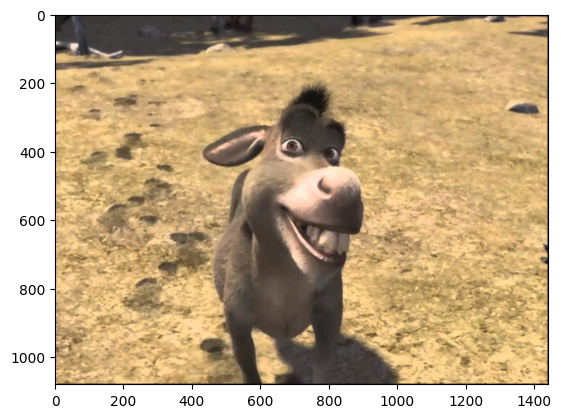

In [ ]:
# prompt: np array to img
# prompt: tensor to np array

new = dequantized_tensor.numpy()
print(new.shape)

# Assuming 'n' is the numpy array you want to convert to an image
from PIL import Image
img = Image.fromarray(new.astype('uint8'), 'RGB')
# Now 'img' is a PIL Image object
plt.imshow(img)


In [ ]:
tensor_image

tensor([[[0.0235, 0.0392, 0.0549,  ..., 0.1137, 0.0745, 0.0510],
         [0.0353, 0.0549, 0.0784,  ..., 0.1647, 0.1255, 0.0941],
         [0.0471, 0.0706, 0.1020,  ..., 0.2157, 0.1725, 0.1333],
         ...,
         [0.4510, 0.5686, 0.7451,  ..., 0.7373, 0.5176, 0.4000],
         [0.3529, 0.4275, 0.5451,  ..., 0.5373, 0.3765, 0.2980],
         [0.2471, 0.2824, 0.3451,  ..., 0.3451, 0.2549, 0.2235]],

        [[0.0314, 0.0471, 0.0627,  ..., 0.0980, 0.0667, 0.0431],
         [0.0431, 0.0627, 0.0863,  ..., 0.1490, 0.1098, 0.0863],
         [0.0549, 0.0784, 0.1098,  ..., 0.1922, 0.1490, 0.1176],
         ...,
         [0.3529, 0.4745, 0.6471,  ..., 0.6431, 0.4157, 0.3098],
         [0.2627, 0.3412, 0.4627,  ..., 0.4549, 0.2902, 0.2235],
         [0.1608, 0.2000, 0.2667,  ..., 0.2706, 0.1765, 0.1529]],

        [[0.0118, 0.0275, 0.0431,  ..., 0.0941, 0.0706, 0.0471],
         [0.0235, 0.0431, 0.0667,  ..., 0.1451, 0.1137, 0.0902],
         [0.0353, 0.0588, 0.0902,  ..., 0.1922, 0.1569, 0.

ValueError: Must pass 2-d input. shape=(3, 1080, 1440)

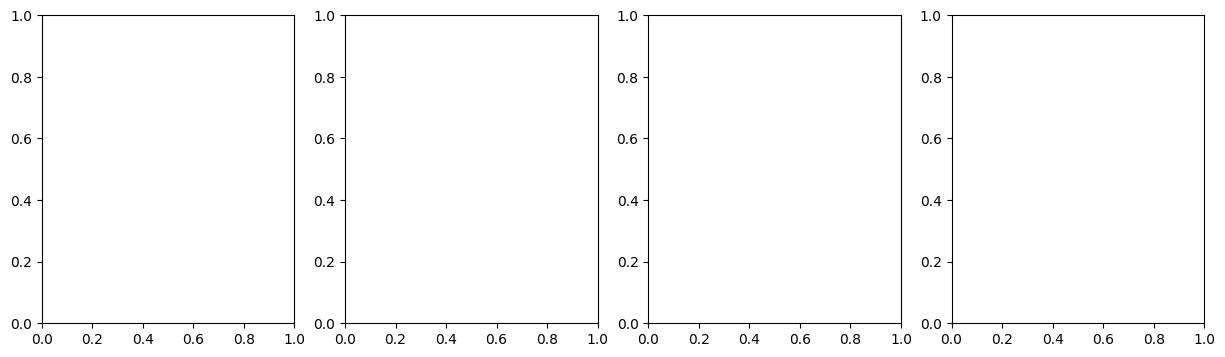

In [ ]:
plot_quantization_errors(tensor_image, quantized_tensor,
                         dequantized_tensor)